In [1]:
import pandas as pd

def read_dataframe(filename: str):
    df = pd.read_parquet(filename)

    return df

In [2]:
df = read_dataframe("../data/yellow_tripdata_2022-01.parquet")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [4]:
def get_features(df):
    targets = df.fare_amount.copy()
    features = pd.DataFrame(df["passenger_count"].copy())
    features.passenger_count.fillna(1, inplace=True)
    features["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
    features["pickup_minutes"] = df["tpep_pickup_datetime"].dt.minute
    features["weekday"] = df["tpep_pickup_datetime"].dt.weekday
    return features, targets

In [5]:
X, y = get_features(df)

<AxesSubplot:>

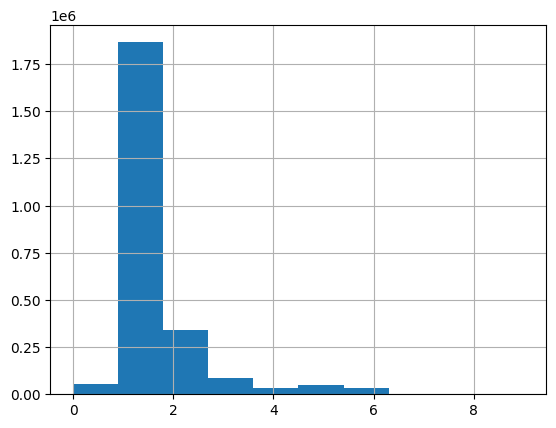

In [30]:
X.passenger_count.hist()

In [31]:
X.isna().sum()

passenger_count    0
pickup_hour        0
pickup_minutes     0
weekday            0
dtype: int64